In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib  as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/Advertising.csv")

In [3]:
data.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [4]:
data.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


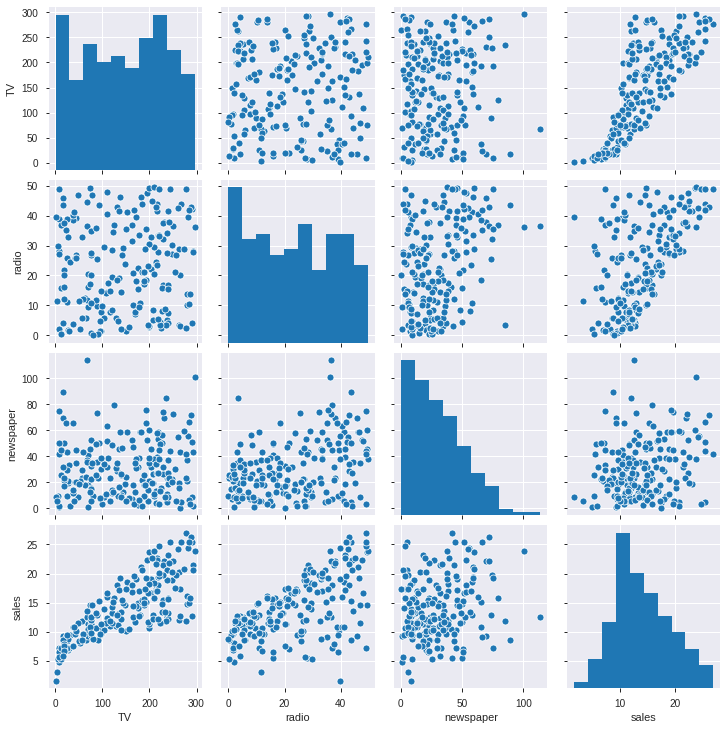

In [6]:
sns.pairplot(data)

In [8]:
pandas_profiling.ProfileReport(data)

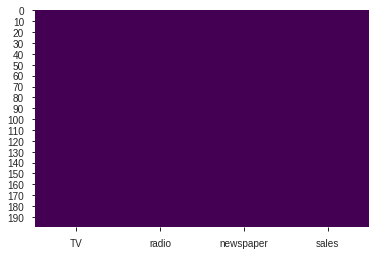

In [9]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
x_data=data[['TV','radio','newspaper']]
x_data.shape

(200, 3)

In [31]:
y_data=data['sales']
y_data.shape

(200,)

In [32]:
# Split the data into training/testing sets
X_train1=x_data[:2500]
X_train2=x_data[2500:4500]
X_test=x_data[4500:]


In [33]:
# Split the targets into training/testing sets
y_train1=y_data[:2500]
y_train2=y_data[2500:4500]
y_test=y_data[4500:]

In [34]:
# Modeify the data to input into sklearn
X_train1=X_train1.values.reshape(-1, 1)
X_train2=X_train2.values.reshape(-1, 1)
X_test=X_test.values.reshape(-1, 1)

In [36]:
# A simple average ensemble model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()

model1.fit(X_train1,y_train1)
model2.fit(X_train2,y_train2)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [600, 200]